# Project Objective

# Five million Americans are currently living with heart diseases, and nubersn are expected to rise.It us important to understandthe factors which cause Heart-Attacks So that certain precaution cn be taken by individuals.

# A data was collected from various hospitals across US which is given in csv format.In the dataset there are Heart-Attack indicates whether person suffered from Heart attack or not 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Heart_disease.csv')

In [3]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.tail()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
print(f'Dataset have {data.shape[0]} rows and {data.shape[1]} columns')

Dataset have 4240 rows and 16 columns


In [6]:
print("Information about the dataset:")
data.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memor

In [7]:
data['age'] = data['age'].astype("float64")
data['Gender'] = data['Gender'].map({0: 'female', 1: 'male'})

In [8]:
data.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
data.dtypes

Gender              object
age                float64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [10]:
for column in data.columns:
    print(column.upper(),':', data[column].nunique())
    print()
    print(data[column].value_counts())
    print()

GENDER : 2

Gender
female    2420
male      1820
Name: count, dtype: int64

AGE : 39

age
40.0    192
46.0    182
42.0    180
41.0    174
48.0    173
39.0    170
44.0    166
45.0    162
43.0    159
52.0    149
51.0    146
55.0    145
38.0    144
47.0    141
50.0    140
53.0    139
54.0    132
49.0    132
57.0    123
56.0    123
59.0    119
58.0    117
60.0    111
63.0    110
61.0    110
62.0     99
64.0     93
37.0     92
36.0     84
65.0     57
67.0     45
35.0     42
66.0     38
34.0     18
68.0     18
69.0      7
33.0      5
70.0      2
32.0      1
Name: count, dtype: int64

EDUCATION : 4

education
1.0    1720
2.0    1253
3.0     689
4.0     473
Name: count, dtype: int64

CURRENTSMOKER : 2

currentSmoker
0    2145
1    2095
Name: count, dtype: int64

CIGSPERDAY : 33

cigsPerDay
0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12

In [11]:
cat =["education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]

In [12]:
for i in cat:
    data[i]=data[i].astype("object")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   object 
 1   age              4240 non-null   float64
 2   education        4135 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


In [14]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)

print("Categorical Value: ",cat)
print("\nNumerical Value: ",num)

Categorical Value:  ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

Numerical Value:  ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


In [15]:
data

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39.0,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46.0,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48.0,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61.0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46.0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,female,48.0,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,female,44.0,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,female,52.0,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,male,40.0,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [16]:
print("Summary statistics for numeric columns")
round(data[num].describe(),2).T

Summary statistics for numeric columns


,count,mean,std,min,25%,50%,75%,max
age,4240.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4211.0,9.01,11.92,0.00,0.00,0.0,20.00,70.0
totChol,4190.0,236.70,44.59,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.35,22.03,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4221.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4239.0,75.88,12.03,44.00,68.00,75.0,83.00,143.0
glucose,3852.0,81.96,23.95,40.00,71.00,78.0,87.00,394.0
TenYearCHD,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [17]:
print("Summary statistics for categorical columns")
round(data[cat].describe(),2).T

Summary statistics for categorical columns


,count,unique,top,freq
Gender,4240,2,female,2420
education,4135.0,4.0,1.0,1720.0
currentSmoker,4240,2,0,2145
BPMeds,4187.0,2.0,0.0,4063.0
prevalentStroke,4240,2,0,4215
prevalentHyp,4240,2,0,2923
diabetes,4240,2,0,4131


# Check for missing values

In [18]:
data.isnull().sum()

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [19]:
round(data.isnull().sum() * 100 / data.shape[0],2).sort_values()

Gender             0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
TenYearCHD         0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
BPMeds             1.25
education          2.48
glucose            9.15
dtype: float64

# Check for duplicates

In [20]:
duplicates = data[data.duplicated()]
data.drop_duplicates(inplace=True)
if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


In [21]:
data_mean = data.copy()

In [22]:
for column in ['BPMeds','education']:
    data_mean[column].fillna(data_mean[column].mode()[0],inplace=True)

In [23]:
for column in ['heartRate','BMI','cigsPerDay','totChol','glucose']:
    data_mean[column].fillna(data_mean[column].mean(),inplace=True)

In [24]:
#Check for missing values

data_mean.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
data_mean

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39.0,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,female,46.0,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,male,48.0,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,female,61.0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,female,46.0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,female,48.0,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,female,44.0,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,female,52.0,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,male,40.0,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [26]:
for i in["prevalentStroke","prevalentHyp","diabetes"]:
    data_mean[i] = data_mean[i].astype("float")

In [27]:
data_mean['Gender'].replace(to_replace=['male','female'],value=[1,0],inplace=True)

In [28]:
data_mean

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46.0,2.0,0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48.0,1.0,1,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61.0,3.0,1,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46.0,3.0,1,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,1,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44.0,1.0,1,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52.0,2.0,0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40.0,3.0,0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0


# Univariate and bivariate Analysis

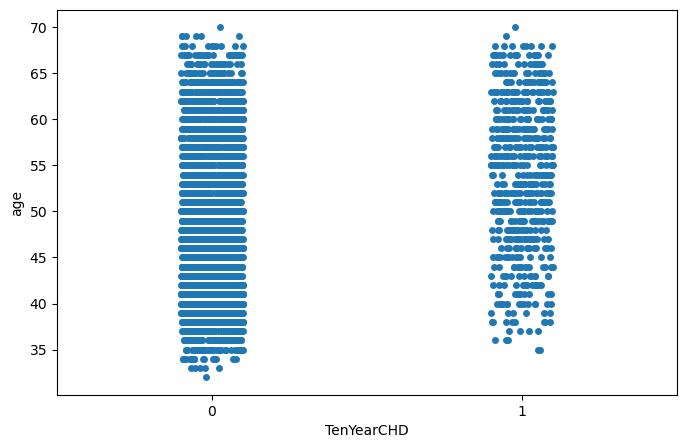

In [29]:
plt.figure(figsize=(8,5))
sns.stripplot(x=data["TenYearCHD"],y=data['age'],jitter=True)
plt.show()

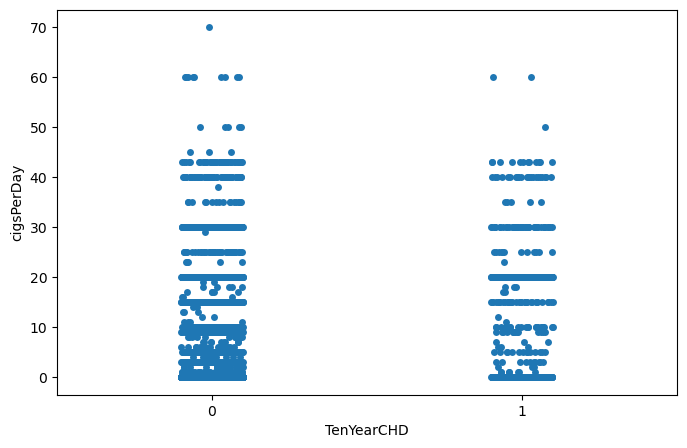

In [30]:
plt.figure(figsize=(8,5))
sns.stripplot(x=data["TenYearCHD"],y=data['cigsPerDay'],jitter=True)
plt.show()

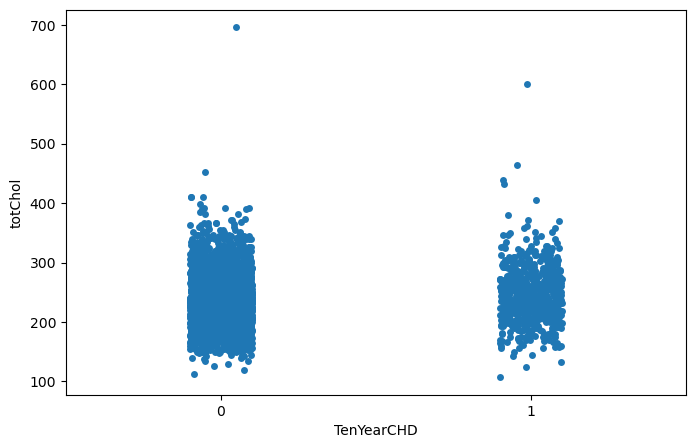

In [31]:
plt.figure(figsize=(8,5))
sns.stripplot(x=data["TenYearCHD"],y=data['totChol'],jitter=True)
plt.show()

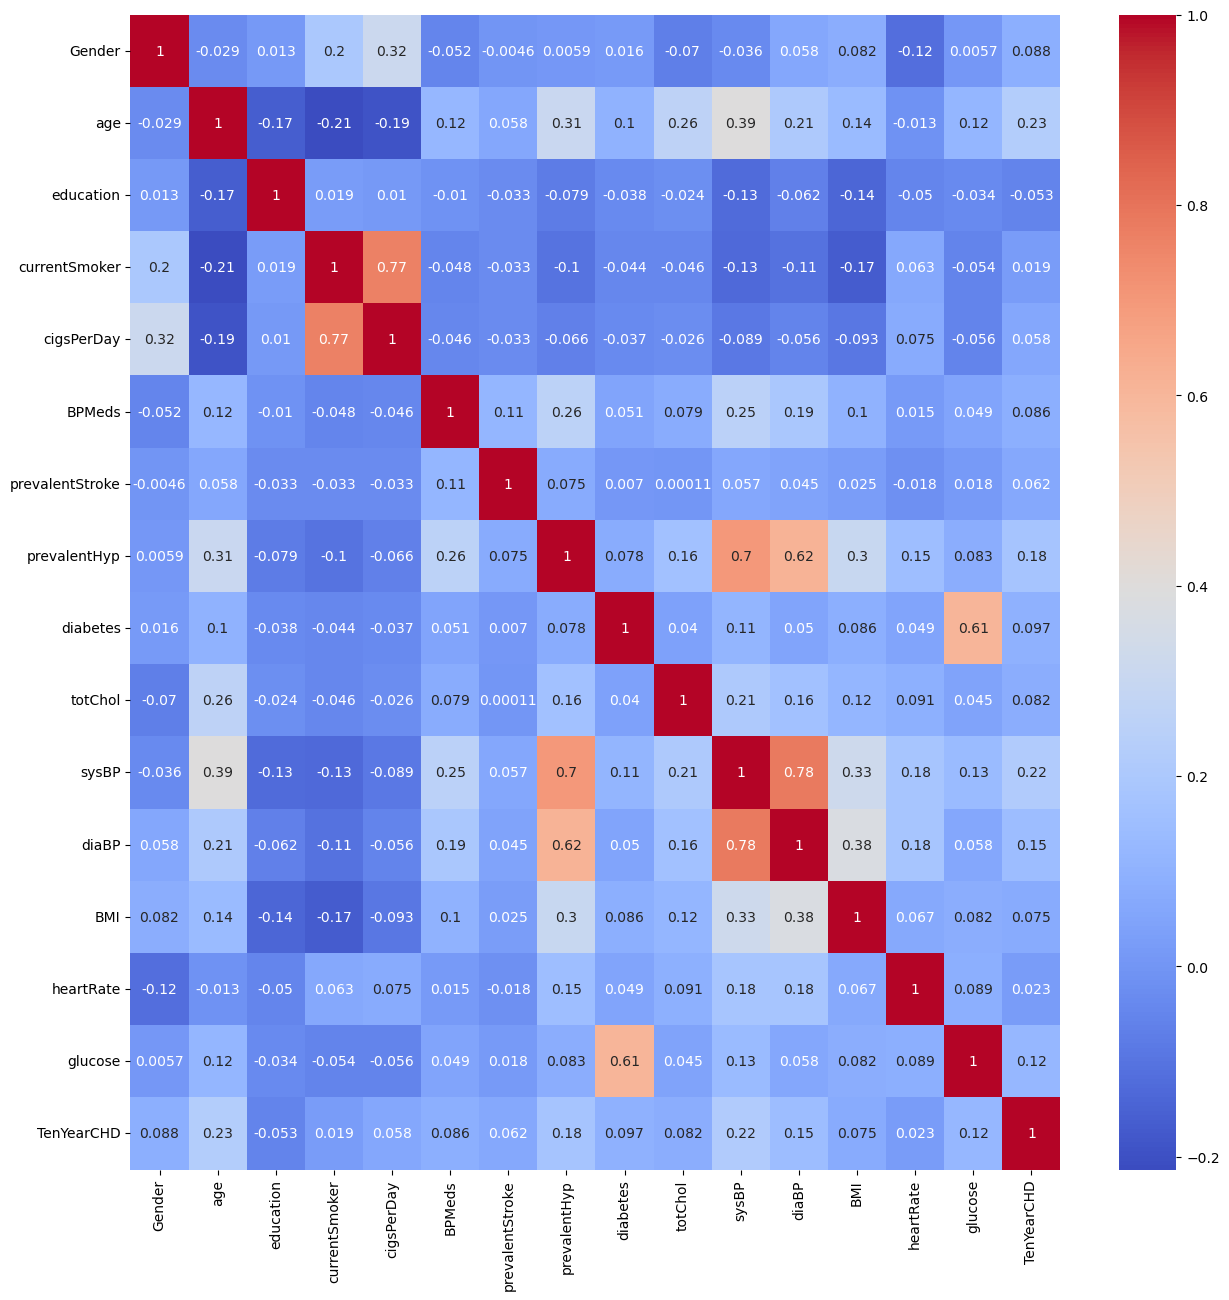

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data_mean.corr(),annot=True,cmap='coolwarm')
plt.show()

In [33]:
data_mean.drop(['currentSmoker','diaBP'],axis=1,inplace=True)

In [34]:
data_mean

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.000000,0
1,0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.000000,0
2,1,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.000000,0
3,0,61.0,3.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.000000,1
4,0,46.0,3.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48.0,2.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.000000,0
4236,0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,81.963655,0
4237,0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.000000,0
4238,1,40.0,3.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,25.60,67.0,72.000000,0


# Outlier Treatment

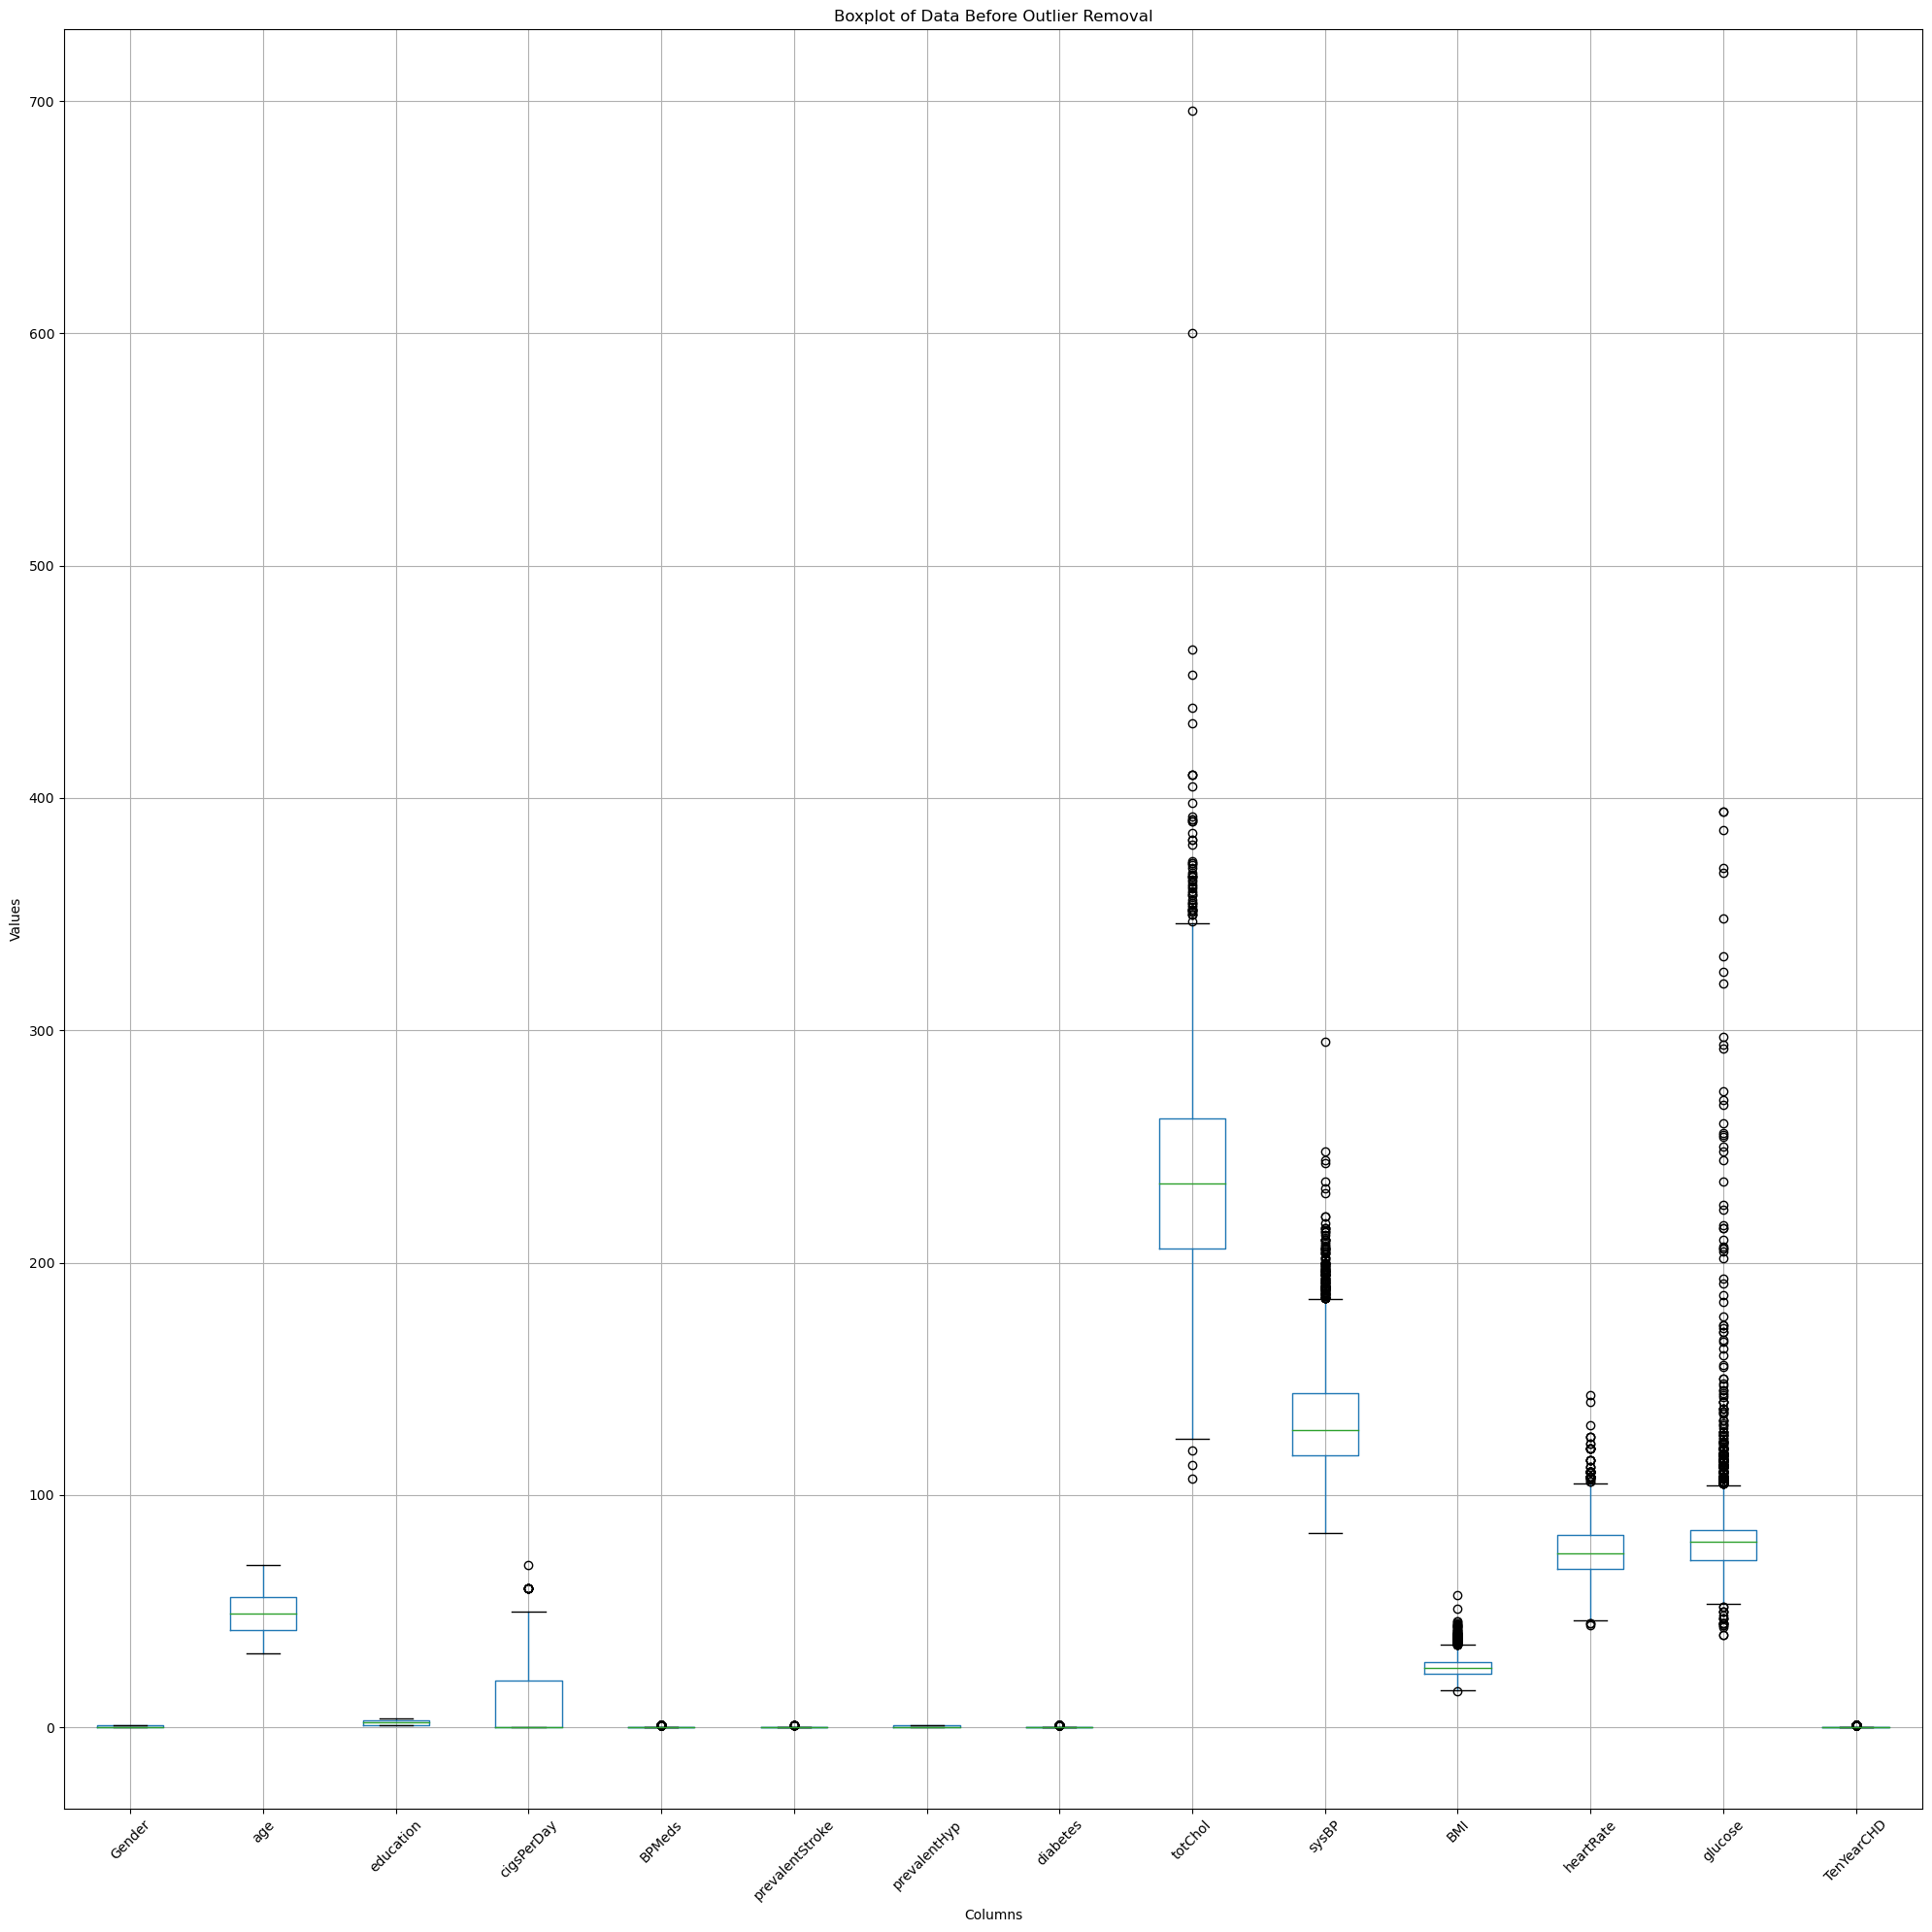

In [35]:
def boxplot_before(df):
    df.boxplot(figsize=(20, 20))
    plt.title('Boxplot of Data Before Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


boxplot_before(data_mean)

In [36]:
data_mean_o = data_mean.copy()

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    return lower_bound,upper_bound

In [39]:
for column in data_mean_o.drop('glucose',axis=1).columns:
    lb,ub=remove_outlier(data_mean_o[column])
    data_mean_o[column]=np.where(data_mean_o[column]>ub,ub,data_mean_o[column])
    data_mean_o[column]=np.where(data_mean_o[column]<lb,lb,data_mean_o[column])

In [40]:
data_mean_o.drop('glucose',axis=1).columns

Index(['Gender', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate',
       'TenYearCHD'],
      dtype='object')

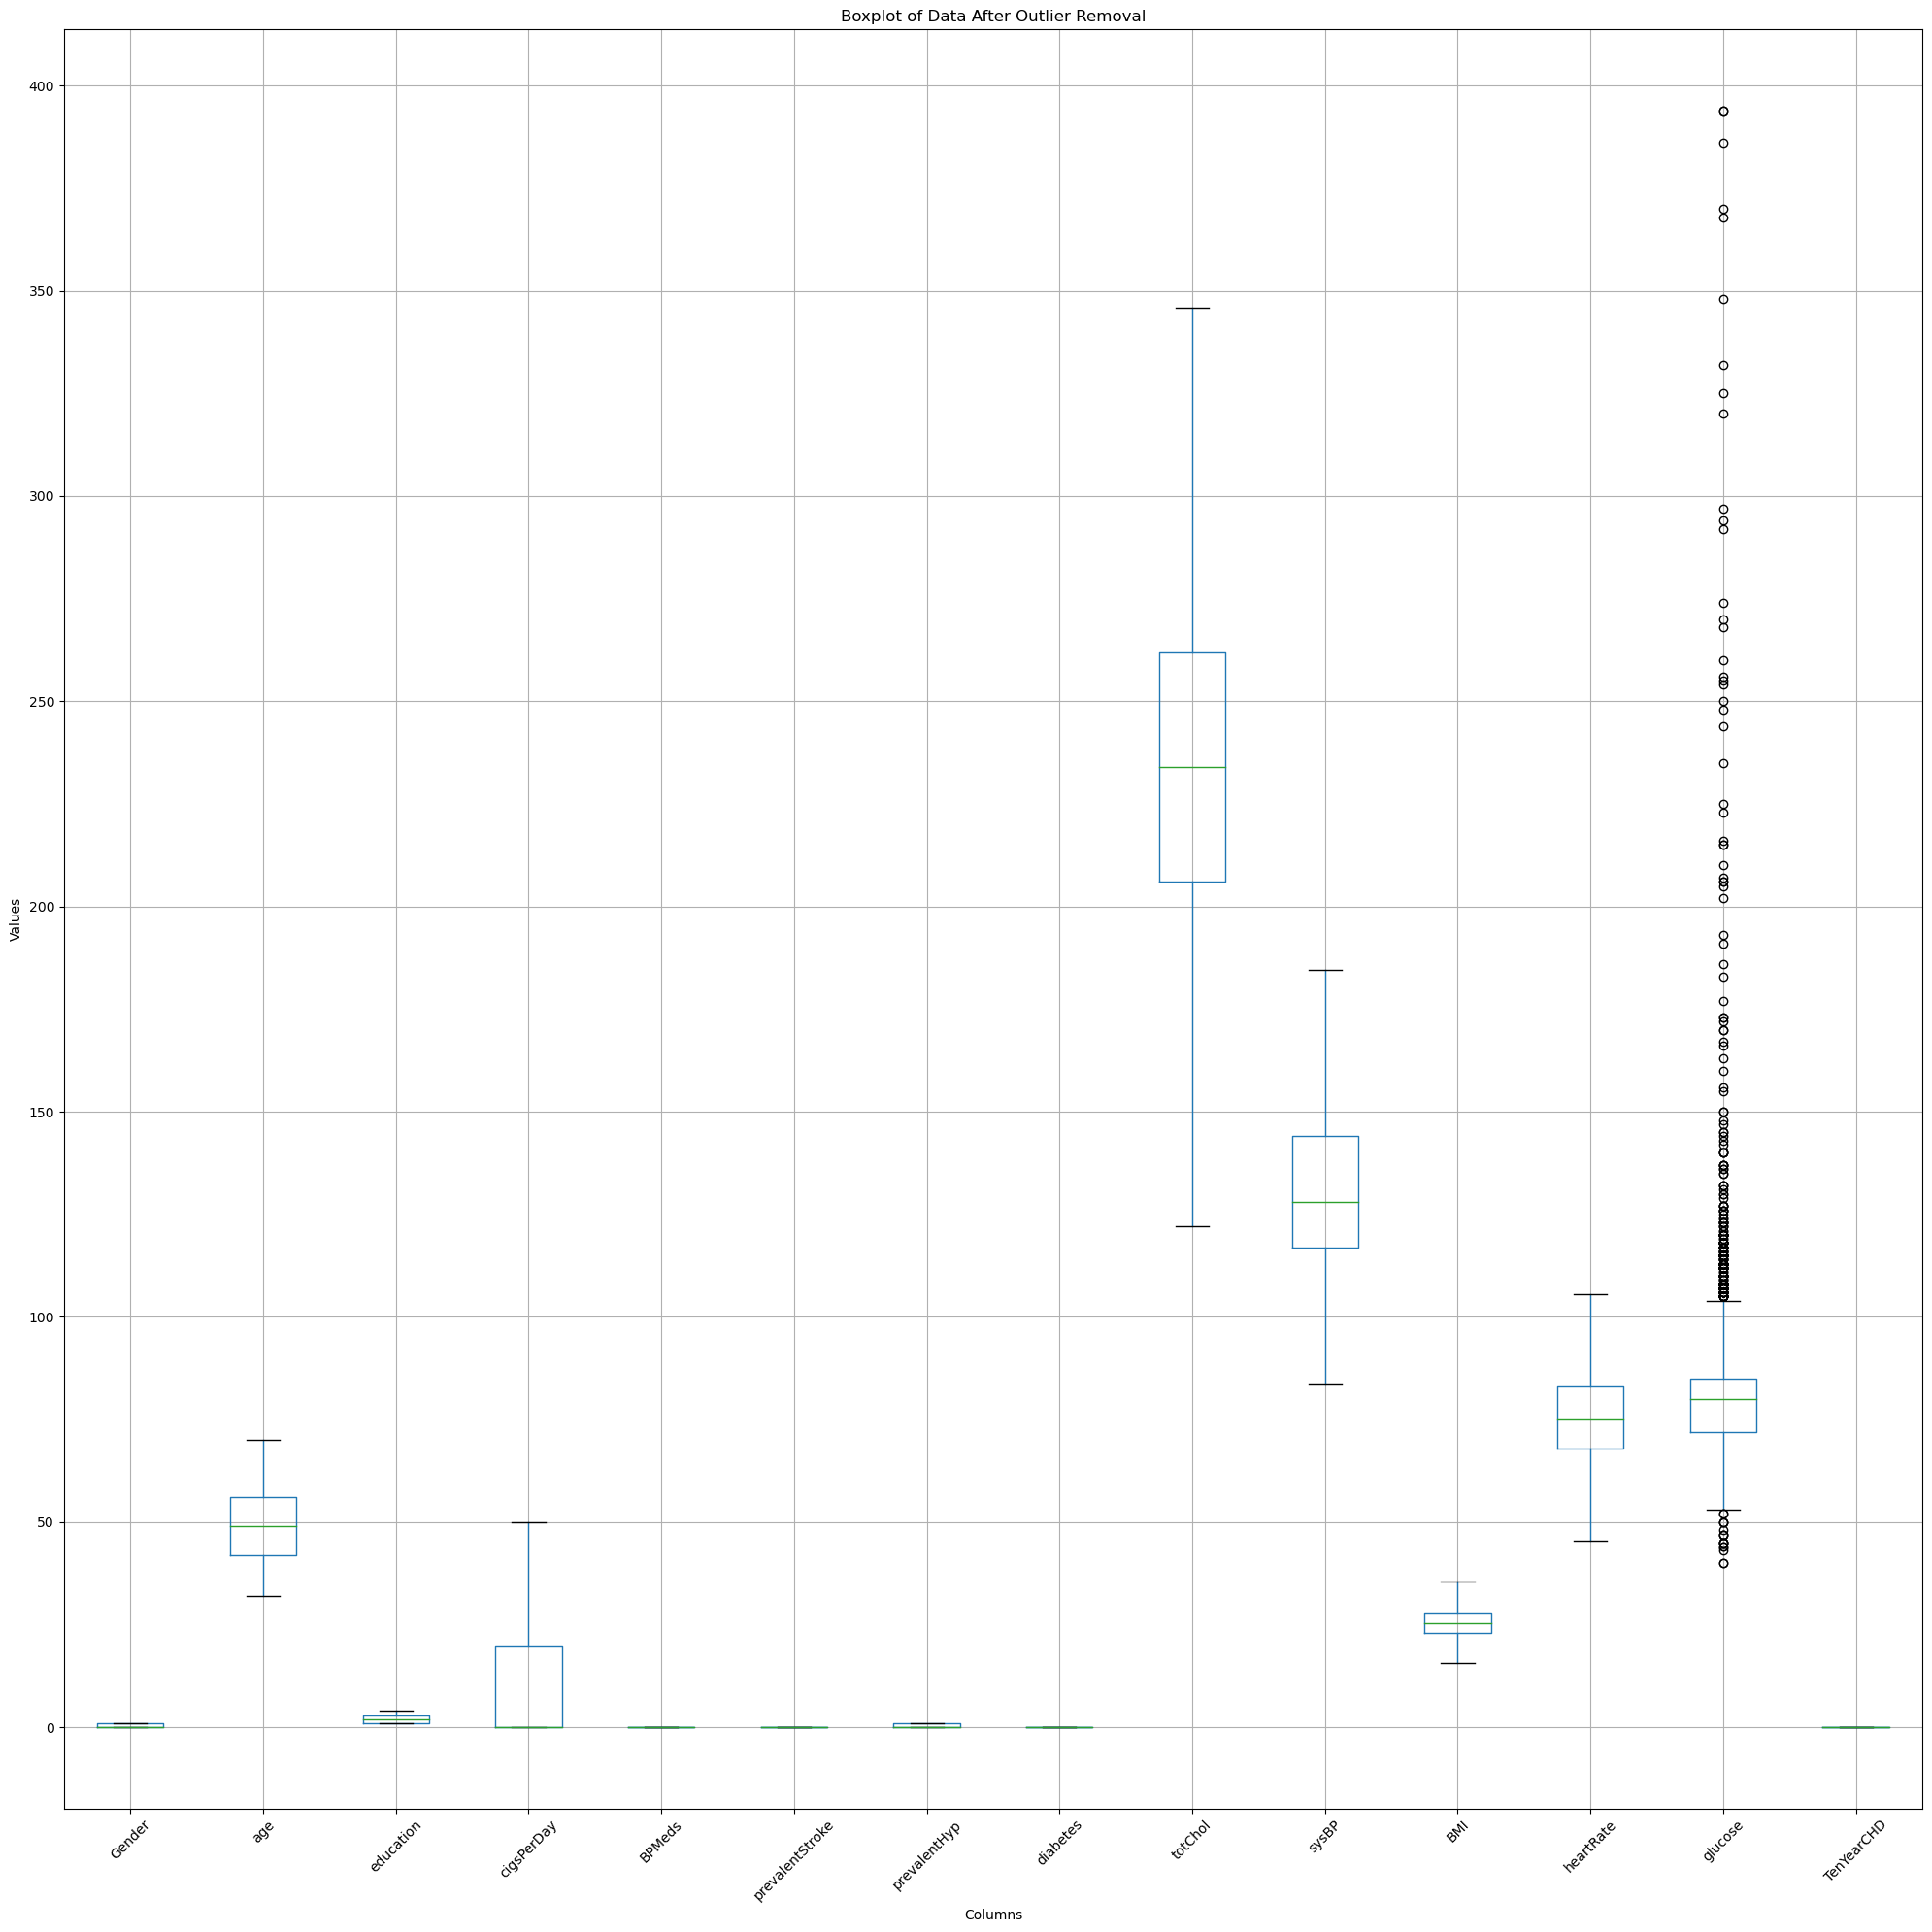

In [41]:
def boxplot_before(df):
    df.boxplot(figsize=(20, 20))
    plt.title('Boxplot of Data After Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


boxplot_before(data_mean_o)

# Scaling

# Min-Max Scaling

In [42]:
data_mean_o

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.000000,0.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,81.963655,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,25.60,67.0,72.000000,0.0


In [43]:
data_mean_o = data_mean_o.drop(['BPMeds','prevalentStroke','diabetes'],axis=1).apply(lambda x:(x-x.min()) / (x.max() - x.min()))

In [44]:
data_mean_o

,Gender,age,education,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.00,0.0,0.325893,0.222772,0.571393,0.575000,0.104520,NaN
1,0.0,0.368421,0.333333,0.00,0.0,0.571429,0.371287,0.660192,0.825000,0.101695,NaN
2,1.0,0.421053,0.000000,0.40,0.0,0.549107,0.435644,0.489152,0.491667,0.084746,NaN
3,0.0,0.763158,0.666667,0.60,1.0,0.459821,0.658416,0.652624,0.325000,0.177966,NaN
4,0.0,0.368421,0.666667,0.46,0.0,0.727679,0.460396,0.376135,0.658333,0.127119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,0.40,0.0,0.562500,0.470297,0.320636,0.641667,0.129944,NaN
4236,0.0,0.315789,0.000000,0.30,0.0,0.392857,0.425743,0.177346,0.675000,0.118541,NaN
4237,0.0,0.526316,0.333333,0.00,0.0,0.656250,0.495050,0.293895,0.575000,0.189266,NaN
4238,1.0,0.210526,0.666667,0.00,1.0,0.281250,0.569307,0.502270,0.358333,0.090395,NaN


In [45]:
data_mean = data_mean.apply(lambda x:(x-x.min()) / (x.max() - x.min()))

In [46]:
data_mean

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.333333,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.000000,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.666667,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.666667,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,0.285714,0.0,0.0,0.0,0.0,0.239389,0.224586,0.156568,0.404040,0.129944,0.0
4236,0.0,0.315789,0.000000,0.214286,0.0,0.0,0.0,0.0,0.174873,0.203310,0.087736,0.424242,0.118541,0.0
4237,0.0,0.526316,0.333333,0.000000,0.0,0.0,0.0,0.0,0.275042,0.236407,0.143723,0.363636,0.189266,0.0
4238,1.0,0.210526,0.666667,0.000000,0.0,0.0,1.0,0.0,0.132428,0.271868,0.243820,0.232323,0.090395,0.0


# Model building on mean data

In [47]:
X = data_mean.drop('TenYearCHD',axis=1)
y = data_mean['TenYearCHD']

In [48]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state=1)

In [49]:
X_train

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
4033,0.0,0.447368,0.000000,0.214286,0.0,0.0,0.0,0.0,0.213922,0.137116,0.298837,0.525253,0.112994
3710,1.0,0.368421,0.666667,0.428571,0.0,0.0,1.0,0.0,0.079796,0.271868,0.174988,0.212121,0.070621
1453,1.0,0.368421,0.000000,0.285714,0.0,0.0,0.0,0.0,0.292020,0.163121,0.175473,0.141414,0.096045
2425,0.0,0.815789,0.000000,0.000000,0.0,0.0,0.0,0.0,0.207131,0.172577,0.243335,0.343434,0.093220
1010,1.0,0.263158,0.000000,0.428571,0.0,0.0,0.0,0.0,0.212224,0.132388,0.309258,0.464646,0.112994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.0,0.342105,0.333333,0.428571,0.0,0.0,1.0,0.0,0.125637,0.260047,0.261270,0.464646,0.118541
2763,1.0,0.368421,0.000000,0.128571,0.0,0.0,0.0,0.0,0.251273,0.141844,0.186137,0.161616,0.118541
905,1.0,0.157895,0.333333,0.285714,0.0,0.0,1.0,0.0,0.342954,0.304965,0.371062,0.515152,0.118541
3980,0.0,0.605263,0.333333,0.000000,0.0,0.0,0.0,0.0,0.281834,0.196217,0.182016,0.414141,0.076271


In [50]:
X_test

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
534,1.0,0.105263,0.000000,0.000000,0.0,0.0,1.0,0.0,0.127334,0.290780,0.372758,0.282828,0.084746
2751,1.0,0.184211,0.333333,0.285714,0.0,0.0,0.0,0.0,0.302207,0.172577,0.309985,0.515152,0.110169
3599,0.0,0.315789,0.333333,0.285714,0.0,0.0,1.0,0.0,0.276740,0.397163,0.139118,0.414141,0.104520
518,1.0,0.078947,0.333333,0.285714,0.0,0.0,0.0,0.0,0.210526,0.182033,0.175473,0.282828,0.149718
3813,0.0,0.315789,0.666667,0.000000,0.0,0.0,0.0,0.0,0.254669,0.215130,0.291323,0.313131,0.101695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,1.0,0.842105,0.666667,0.000000,0.0,0.0,0.0,0.0,0.207131,0.101655,0.271934,0.404040,0.104520
346,0.0,0.552632,0.333333,0.000000,1.0,0.0,1.0,0.0,0.242784,0.286052,0.320892,0.464646,0.107345
2346,0.0,0.447368,0.000000,0.000000,0.0,0.0,0.0,0.0,0.235993,0.111111,0.334949,0.353535,0.112994
582,0.0,0.500000,0.333333,0.257143,0.0,0.0,1.0,0.0,0.117148,0.295508,0.287930,0.363636,0.127119


In [51]:
y_train

4033    0.0
3710    0.0
1453    0.0
2425    0.0
1010    0.0
       ... 
2895    0.0
2763    0.0
905     0.0
3980    0.0
235     0.0
Name: TenYearCHD, Length: 2968, dtype: float64

In [52]:
y_test

534     0.0
2751    0.0
3599    0.0
518     0.0
3813    0.0
       ... 
1962    0.0
346     0.0
2346    0.0
582     0.0
3626    0.0
Name: TenYearCHD, Length: 1272, dtype: float64

# Decision Tree

In [53]:
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

Report of trained data : 
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



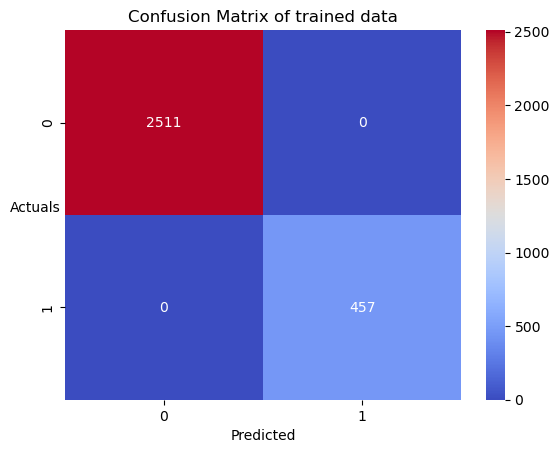

In [54]:
# train data

y_train_predict = DT_model.predict(X_train)

sns.heatmap((confusion_matrix(y_train,y_train_predict)), annot=True,fmt='.5g',cmap="coolwarm");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of trained data')

print("Report of trained data : \n ",classification_report(y_train_predict,y_train))

Report of test data :
                precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1065
         1.0       0.25      0.23      0.24       207

    accuracy                           0.76      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.75      0.76      0.76      1272



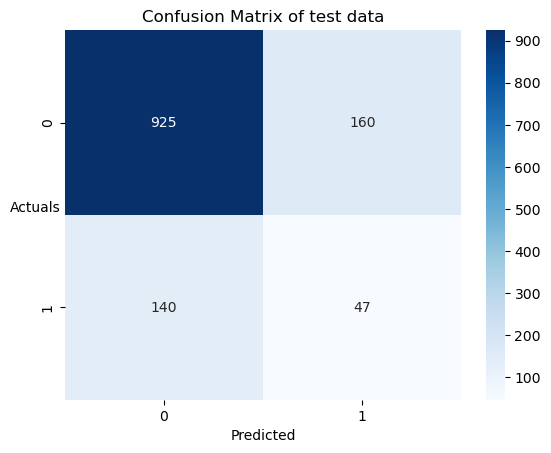

In [55]:
# test data

y_test_predict = DT_model.predict(X_test)

sns.heatmap((confusion_matrix(y_test,y_test_predict)), annot=True,fmt='.5g',cmap="Blues");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of test data')

print("Report of test data :\n ",classification_report(y_test_predict,y_test))

# Random Forest

In [56]:
RF_model = RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

Report of trained data :
                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



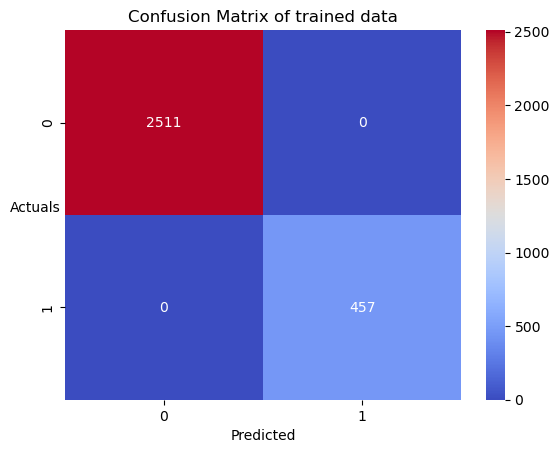

In [57]:
# train data

y_train_predict = RF_model.predict(X_train)

sns.heatmap((confusion_matrix(y_train,y_train_predict)), annot=True,fmt='.5g',cmap="coolwarm");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of trained data')

print("Report of trained data :\n ",classification_report(y_train_predict,y_train))

Report of test data :
                precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1248
         1.0       0.06      0.50      0.11        24

    accuracy                           0.85      1272
   macro avg       0.53      0.68      0.52      1272
weighted avg       0.97      0.85      0.90      1272



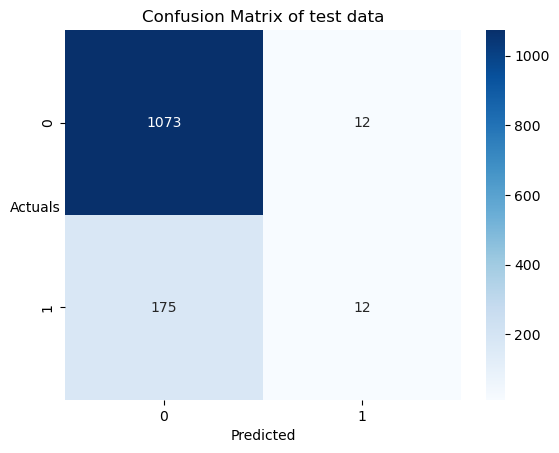

In [58]:

# test data

y_test_predict = RF_model.predict(X_test)

sns.heatmap((confusion_matrix(y_test,y_test_predict)), annot=True,fmt='.5g',cmap="Blues");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of test data')

print("Report of test data :\n ",classification_report(y_test_predict,y_test))

# Adaboost 

In [59]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

Report of trained data :
                precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2877
         1.0       0.14      0.71      0.24        91

    accuracy                           0.86      2968
   macro avg       0.57      0.79      0.58      2968
weighted avg       0.96      0.86      0.90      2968



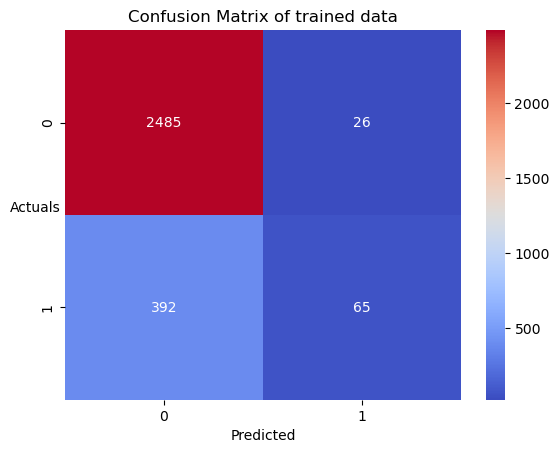

In [60]:
# train data

y_train_predict = ADB_model.predict(X_train)

sns.heatmap((confusion_matrix(y_train,y_train_predict)), annot=True,fmt='.5g',cmap="coolwarm");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of trained data')

print("Report of trained data :\n ",classification_report(y_train_predict,y_train))

Report of test data :
                precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1239
         1.0       0.07      0.42      0.13        33

    accuracy                           0.85      1272
   macro avg       0.53      0.64      0.52      1272
weighted avg       0.96      0.85      0.90      1272



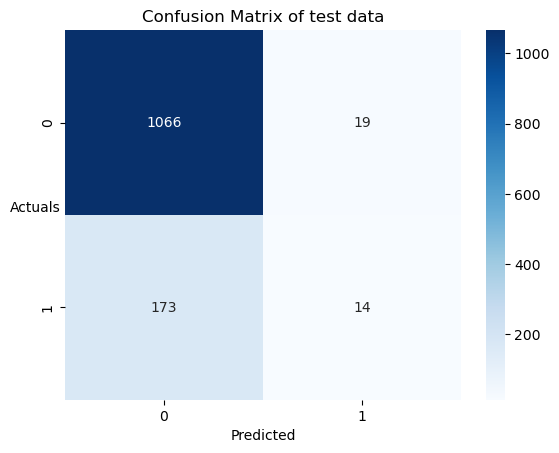

In [61]:
# test data

y_test_predict = ADB_model.predict(X_test)

sns.heatmap((confusion_matrix(y_test,y_test_predict)), annot=True,fmt='.5g',cmap="Blues");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of test data')

print("Report of test data :\n ",classification_report(y_test_predict,y_test))

# Gaussian Boosting

In [62]:
GB_model = GradientBoostingClassifier(n_estimators=100,random_state=1)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Report of trained data :
                precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      2854
         1.0       0.24      0.97      0.39       114

    accuracy                           0.88      2968
   macro avg       0.62      0.93      0.66      2968
weighted avg       0.97      0.88      0.91      2968



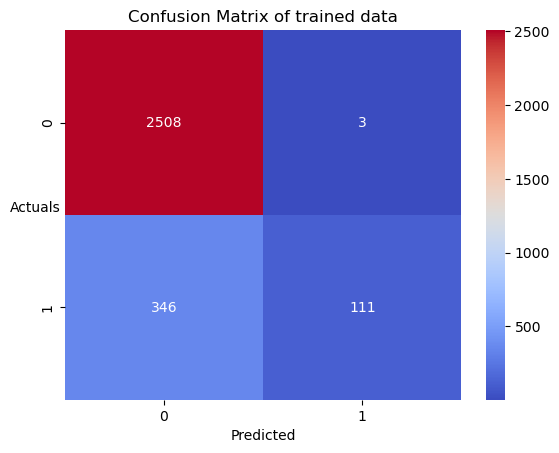

In [63]:
# train data

y_train_predict = GB_model.predict(X_train)

sns.heatmap((confusion_matrix(y_train,y_train_predict)), annot=True,fmt='.5g',cmap="coolwarm");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of trained data')

print("Report of trained data :\n ",classification_report(y_train_predict,y_train))

Report of test data :
                precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1245
         1.0       0.07      0.48      0.12        27

    accuracy                           0.85      1272
   macro avg       0.53      0.67      0.52      1272
weighted avg       0.97      0.85      0.90      1272



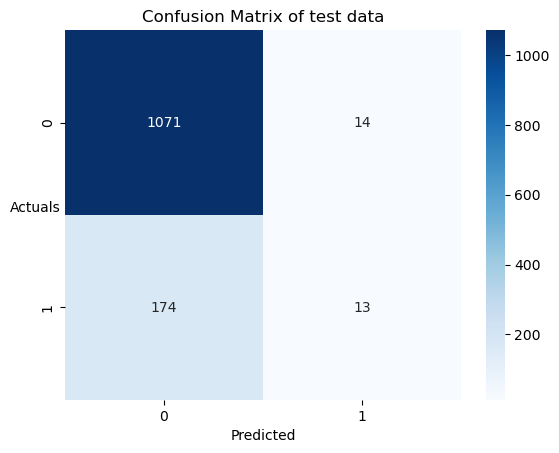

In [64]:
# test data

y_test_predict = GB_model.predict(X_test)

sns.heatmap((confusion_matrix(y_test,y_test_predict)), annot=True,fmt='.5g',cmap="Blues");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of test data')

print("Report of test data :\n ",classification_report(y_test_predict,y_test))

# KNN

In [65]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

Report of trained data :
                precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2824
         1.0       0.24      0.76      0.36       144

    accuracy                           0.87      2968
   macro avg       0.61      0.82      0.65      2968
weighted avg       0.95      0.87      0.90      2968



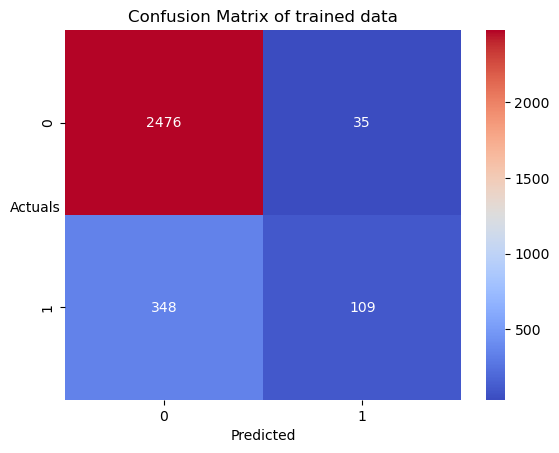

In [66]:
# train data

y_train_predict = KNN_model.predict(X_train)

sns.heatmap((confusion_matrix(y_train,y_train_predict)), annot=True,fmt='.5g',cmap="coolwarm");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of trained data')

print("Report of trained data :\n ",classification_report(y_train_predict,y_train))

Report of test data :
                precision    recall  f1-score   support

         0.0       0.96      0.85      0.91      1225
         1.0       0.04      0.17      0.07        47

    accuracy                           0.83      1272
   macro avg       0.50      0.51      0.49      1272
weighted avg       0.93      0.83      0.87      1272



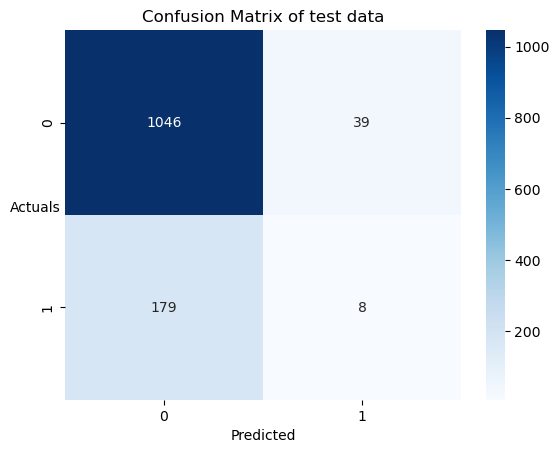

In [67]:
# test data

y_test_predict = KNN_model.predict(X_test)

sns.heatmap((confusion_matrix(y_test,y_test_predict)), annot=True,fmt='.5g',cmap="Blues");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('Confusion Matrix of test data')

print("Report of test data :\n ",classification_report(y_test_predict,y_test))

# Grid Search

In [68]:
# param_grid = {
#     'max_depth': [7,8,9,10],
#     'max_features': [11,12,13,14,15],
#     'min_samples_leaf': [20,25,30,35,40],
#     'min_samples_split': [60,65,70,75],
#     'n_estimators': [100,200,300,400]
# }

# grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv=3)

In [69]:
# grid_search
# grid_search.fit(X_train,y_train)

In [70]:
# # train data

# y_train_predict = grid_search.predict(X_train)

# sns.heatmap((confusion_matrix(y_train,y_train_predict)), annot=True,fmt='.5g',cmap="coolwarm");
# plt.xlabel('Predicted');
# plt.ylabel('Actuals',rotation=0);
# plt.title('Confusion Matrix of trained data')

# print("Report of trained data :\n ",classification_report(y_train_predict,y_train))

In [71]:
# # test data

# y_test_predict = grid_search.predict(X_test)

# sns.heatmap((confusion_matrix(y_test,y_test_predict)), annot=True,fmt='.5g',cmap="Blues");
# plt.xlabel('Predicted');
# plt.ylabel('Actuals',rotation=0);
# plt.title('Confusion Matrix of test data')

# print("Report of test data :\n ",classification_report(y_test_predict,y_test))

In [72]:
import numpy as np
from sklearn import metrics

# Assuming these models are already defined and trained
models = [DT_model, KNN_model, GB_model, ADB_model, RF_model]

train_acc = []
test_acc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []

# Ensure X_train, X_test, y_train, y_test are defined and available
# Assuming they are defined like this:
# X_train, X_test, y_train, y_test = train_test_split(...)

def get_metrics_score(model, flag):
    # Ensure predictions are based on the correct training and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Check the consistency of y and predictions
    assert len(y_train) == len(pred_train), "Inconsistent number of samples in y_train and pred_train"
    assert len(y_test) == len(pred_test), "Inconsistent number of samples in y_test and pred_test"
    
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)
    
    precision_train = metrics.precision_score(y_train, pred_train)
    precision_test = metrics.precision_score(y_test, pred_test)
    
    return [acc_train, acc_test, recall_train, recall_test, precision_train, precision_test]

for model in models:
    j = get_metrics_score(model, False)
    train_acc.append(np.round(j[0], 2))
    test_acc.append(np.round(j[1], 2))
    train_recall.append(np.round(j[2], 2))
    test_recall.append(np.round(j[3], 2))
    train_precision.append(np.round(j[4], 2))
    test_precision.append(np.round(j[5], 2))


In [73]:
comparison_frame = pd.DataFrame({'Model': ['DT_model_mean', 'KNN_model_mean', 'GB_model_mean', 'ADB_model_mean', 'RF_model_mean'],
                                 'Train_Accuracy': train_acc, 'Test_Accuracy': test_acc,
                                 'Train_Recall': train_recall, 'Test_Recall': test_recall,
                                 'Train_Precision': train_precision, 'Test_Precision': test_precision})

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_mean,1.00,0.76,1.00,0.25,1.00,0.23
1,KNN_model_mean,0.87,0.83,0.24,0.04,0.76,0.17
2,GB_model_mean,0.88,0.85,0.24,0.07,0.97,0.48
3,ADB_model_mean,0.86,0.85,0.14,0.07,0.71,0.42
4,RF_model_mean,1.00,0.85,1.00,0.06,1.00,0.50


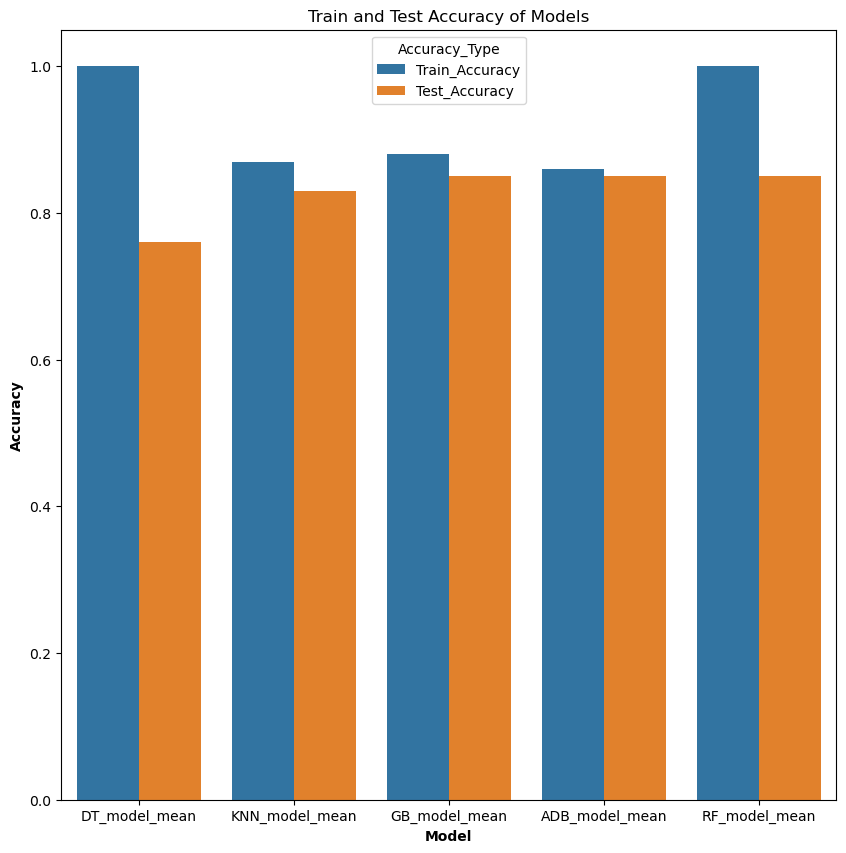

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# comparison_frame = pd.DataFrame({'Model': ['DT_model', 'KNN_model', 'GB_model', 'ADB_model', 'RF_model'],
#                                  'Train_Accuracy': train_acc, 'Test_Accuracy': test_acc,
#                                  'Train_Recall': train_recall, 'Test_Recall': test_recall,
#                                  'Train_Precision': train_precision, 'Test_Precision': test_precision})


accuracy_df = comparison_frame.melt(id_vars='Model', value_vars=['Train_Accuracy', 'Test_Accuracy'], 
                                    var_name='Accuracy_Type', value_name='Accuracy')


plt.figure(figsize=(10, 10))


sns.barplot(x='Model', y='Accuracy', hue='Accuracy_Type', data=accuracy_df)


plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')


plt.title('Train and Test Accuracy of Models')
plt.show()


# For knn

In [75]:
data_knn = data.copy()

In [76]:
for column in ['BPMeds','education']:
    data_knn[column].fillna(data_knn[column].mode()[0],inplace=True)

In [77]:
for column in ['heartRate','BMI','cigsPerDay','totChol','glucose']:
    data_knn[column].fillna(data_knn[column].mean(),inplace=True)

In [79]:
data_knn['Gender'].replace(to_replace=['male','female'],value=[1,0],inplace=True)

In [81]:
for  i in["Gender","education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]:
    data_knn[i] = data_knn[i].astype("float")

In [82]:
data_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 530.1 KB


In [83]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(data_knn)
data_knn = pd.DataFrame(data = df_imputed,columns=data_knn.columns)

In [84]:
data_knn

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.963655,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0.0


In [85]:
data_knn.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# for outlier treatment on knn data

In [86]:
data_knn_o = data_knn.copy()

In [87]:
for column in ['BPMeds','education']:
    data_knn_o[column].fillna(data_knn_o[column].mode()[0],inplace=True)

for column in ['heartRate','BMI','cigsPerDay','totChol','glucose']:
    data_knn_o[column].fillna(data_knn_o[column].mean(),inplace=True)

In [88]:
data_knn_o

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.963655,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0.0


In [89]:
data_knn_o.isnull().sum()

Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [90]:
data_knn_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   float64
dtypes: float64(16)
memory usage: 530.1 KB


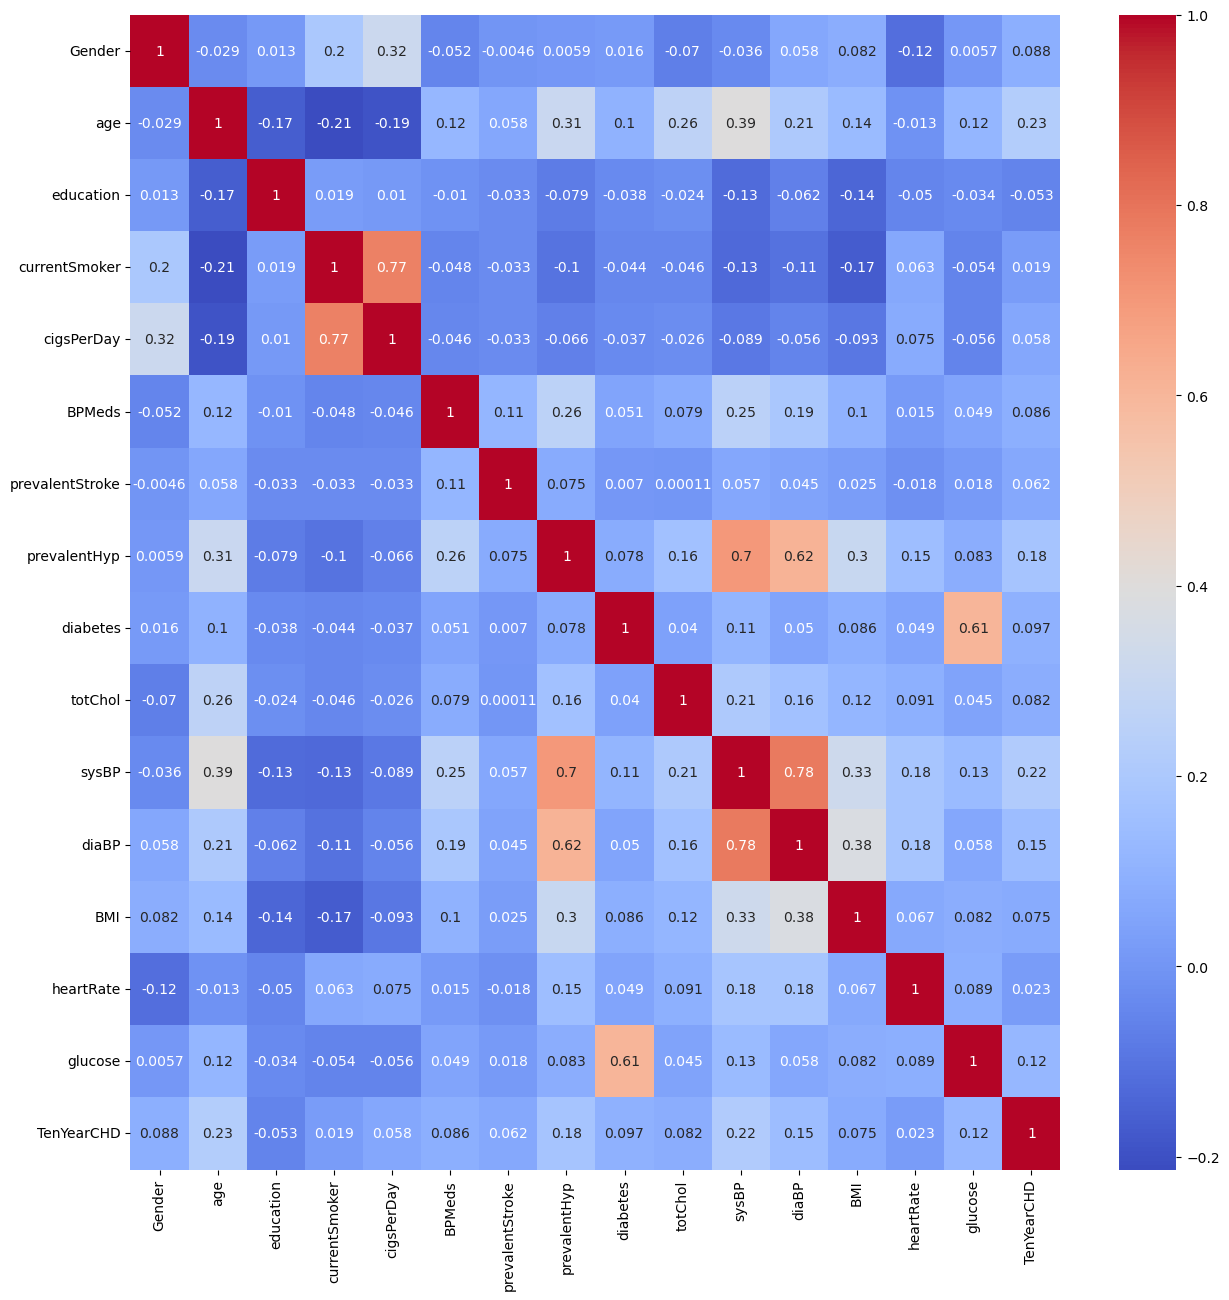

In [91]:
plt.figure(figsize=(15,15))
sns.heatmap(data_knn.corr(),annot=True,cmap='coolwarm')
plt.show()

In [92]:
data_knn.drop(['currentSmoker','diaBP','prevalentHyp'],axis=1,inplace=True)

In [93]:
data_knn

,Gender,age,education,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,20.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,30.0,0.0,0.0,0.0,225.0,150.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,23.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,20.0,0.0,0.0,0.0,248.0,131.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,15.0,0.0,0.0,0.0,210.0,126.5,19.16,86.0,81.963655,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,269.0,133.5,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,185.0,141.0,25.60,67.0,72.000000,0.0


In [94]:
data_knn2 = data_knn.drop(['Gender','BPMeds','prevalentStroke','diabetes','TenYearCHD','education'],axis=1).apply(lambda x:(x-x.min()) / (x.max() - x.min()))

In [95]:
data_knn.columns

Index(['Gender', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [96]:
data_knn2 = data_knn[['age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD']].apply(lambda x:(x-x.min()) / (x.max() - x.min()))

In [97]:
data_knn2

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,0.184211,0.000000,0.149406,0.106383,0.277024,0.363636,0.104520,0.0
1,0.368421,0.000000,0.242784,0.177305,0.319680,0.515152,0.101695,0.0
2,0.421053,0.285714,0.234295,0.208038,0.237518,0.313131,0.084746,0.0
3,0.763158,0.428571,0.200340,0.314421,0.316045,0.212121,0.177966,1.0
4,0.368421,0.328571,0.302207,0.219858,0.183228,0.414141,0.127119,0.0
...,...,...,...,...,...,...,...,...
4235,0.421053,0.285714,0.239389,0.224586,0.156568,0.404040,0.129944,0.0
4236,0.315789,0.214286,0.174873,0.203310,0.087736,0.424242,0.118541,0.0
4237,0.526316,0.000000,0.275042,0.236407,0.143723,0.363636,0.189266,0.0
4238,0.210526,0.000000,0.132428,0.271868,0.243820,0.232323,0.090395,0.0


In [98]:
data_knn2['education'] = data_knn['education']
data_knn2['BPMeds'] = data_knn['BPMeds']
data_knn2['prevalentStroke'] = data_knn['prevalentStroke']
data_knn2['Gender'] = data_knn['Gender']
data_knn2['diabetes'] = data_knn['diabetes']

In [99]:
data_knn2

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD,education,BPMeds,prevalentStroke,Gender,diabetes
0,0.184211,0.000000,0.149406,0.106383,0.277024,0.363636,0.104520,0.0,4.0,0.0,0.0,1.0,0.0
1,0.368421,0.000000,0.242784,0.177305,0.319680,0.515152,0.101695,0.0,2.0,0.0,0.0,0.0,0.0
2,0.421053,0.285714,0.234295,0.208038,0.237518,0.313131,0.084746,0.0,1.0,0.0,0.0,1.0,0.0
3,0.763158,0.428571,0.200340,0.314421,0.316045,0.212121,0.177966,1.0,3.0,0.0,0.0,0.0,0.0
4,0.368421,0.328571,0.302207,0.219858,0.183228,0.414141,0.127119,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.421053,0.285714,0.239389,0.224586,0.156568,0.404040,0.129944,0.0,2.0,0.0,0.0,0.0,0.0
4236,0.315789,0.214286,0.174873,0.203310,0.087736,0.424242,0.118541,0.0,1.0,0.0,0.0,0.0,0.0
4237,0.526316,0.000000,0.275042,0.236407,0.143723,0.363636,0.189266,0.0,2.0,0.0,0.0,0.0,0.0
4238,0.210526,0.000000,0.132428,0.271868,0.243820,0.232323,0.090395,0.0,3.0,0.0,0.0,1.0,0.0


In [100]:
X = data_knn2.drop('TenYearCHD',axis=1)
y = data_knn2['TenYearCHD']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state = 42)

In [101]:
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
RF_model = RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [103]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [104]:
GB_model = GradientBoostingClassifier(n_estimators=100,random_state=1)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [105]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [106]:
import numpy as np
from sklearn import metrics

# Assuming these models are already defined and trained
models = [DT_model, KNN_model, GB_model, ADB_model, RF_model]

train_acc = []
test_acc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []

# Ensure X_train, X_test, y_train, y_test are defined and available
# Assuming they are defined like this:
# X_train, X_test, y_train, y_test = train_test_split(...)

def get_metrics_score(model, flag):
    # Ensure predictions are based on the correct training and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Check the consistency of y and predictions
    assert len(y_train) == len(pred_train), "Inconsistent number of samples in y_train and pred_train"
    assert len(y_test) == len(pred_test), "Inconsistent number of samples in y_test and pred_test"
    
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)
    
    precision_train = metrics.precision_score(y_train, pred_train)
    precision_test = metrics.precision_score(y_test, pred_test)
    
    return [acc_train, acc_test, recall_train, recall_test, precision_train, precision_test]

for model in models:
    j = get_metrics_score(model, False)
    train_acc.append(np.round(j[0], 2))
    test_acc.append(np.round(j[1], 2))
    train_recall.append(np.round(j[2], 2))
    test_recall.append(np.round(j[3], 2))
    train_precision.append(np.round(j[4], 2))
    test_precision.append(np.round(j[5], 2))

In [107]:
comparison_frame = pd.DataFrame({'Model': ['DT_model_knn', 'KNN_model_knn', 'GB_model_knn', 'ADB_model_knn', 'RF_model_knn'],
                                 'Train_Accuracy': train_acc, 'Test_Accuracy': test_acc,
                                 'Train_Recall': train_recall, 'Test_Recall': test_recall,
                                 'Train_Precision': train_precision, 'Test_Precision': test_precision})

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_knn,1.00,0.77,1.00,0.25,1.00,0.24
1,KNN_model_knn,0.86,0.84,0.19,0.08,0.67,0.34
2,GB_model_knn,0.88,0.85,0.19,0.11,0.99,0.51
3,ADB_model_knn,0.86,0.84,0.15,0.10,0.67,0.38
4,RF_model_knn,1.00,0.85,1.00,0.10,1.00,0.59


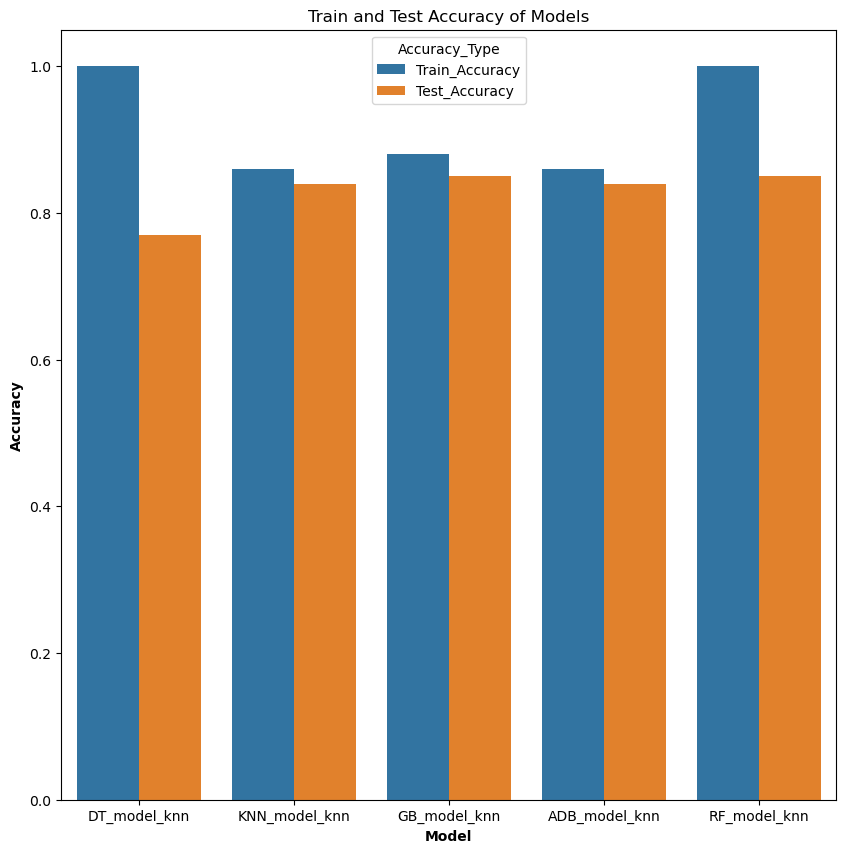

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# comparison_frame = pd.DataFrame({'Model': ['DT_model', 'KNN_model', 'GB_model', 'ADB_model', 'RF_model'],
#                                  'Train_Accuracy': train_acc, 'Test_Accuracy': test_acc,
#                                  'Train_Recall': train_recall, 'Test_Recall': test_recall,
#                                  'Train_Precision': train_precision, 'Test_Precision': test_precision})


accuracy_df = comparison_frame.melt(id_vars='Model', value_vars=['Train_Accuracy', 'Test_Accuracy'], 
                                    var_name='Accuracy_Type', value_name='Accuracy')


plt.figure(figsize=(10, 10))


sns.barplot(x='Model', y='Accuracy', hue='Accuracy_Type', data=accuracy_df)


plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')


plt.title('Train and Test Accuracy of Models')
plt.show()

# Model building on knn_o data

In [109]:
data_knn_o

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.000000,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.000000,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.000000,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.000000,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.0,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.000000,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,81.963655,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.000000,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.000000,0.0


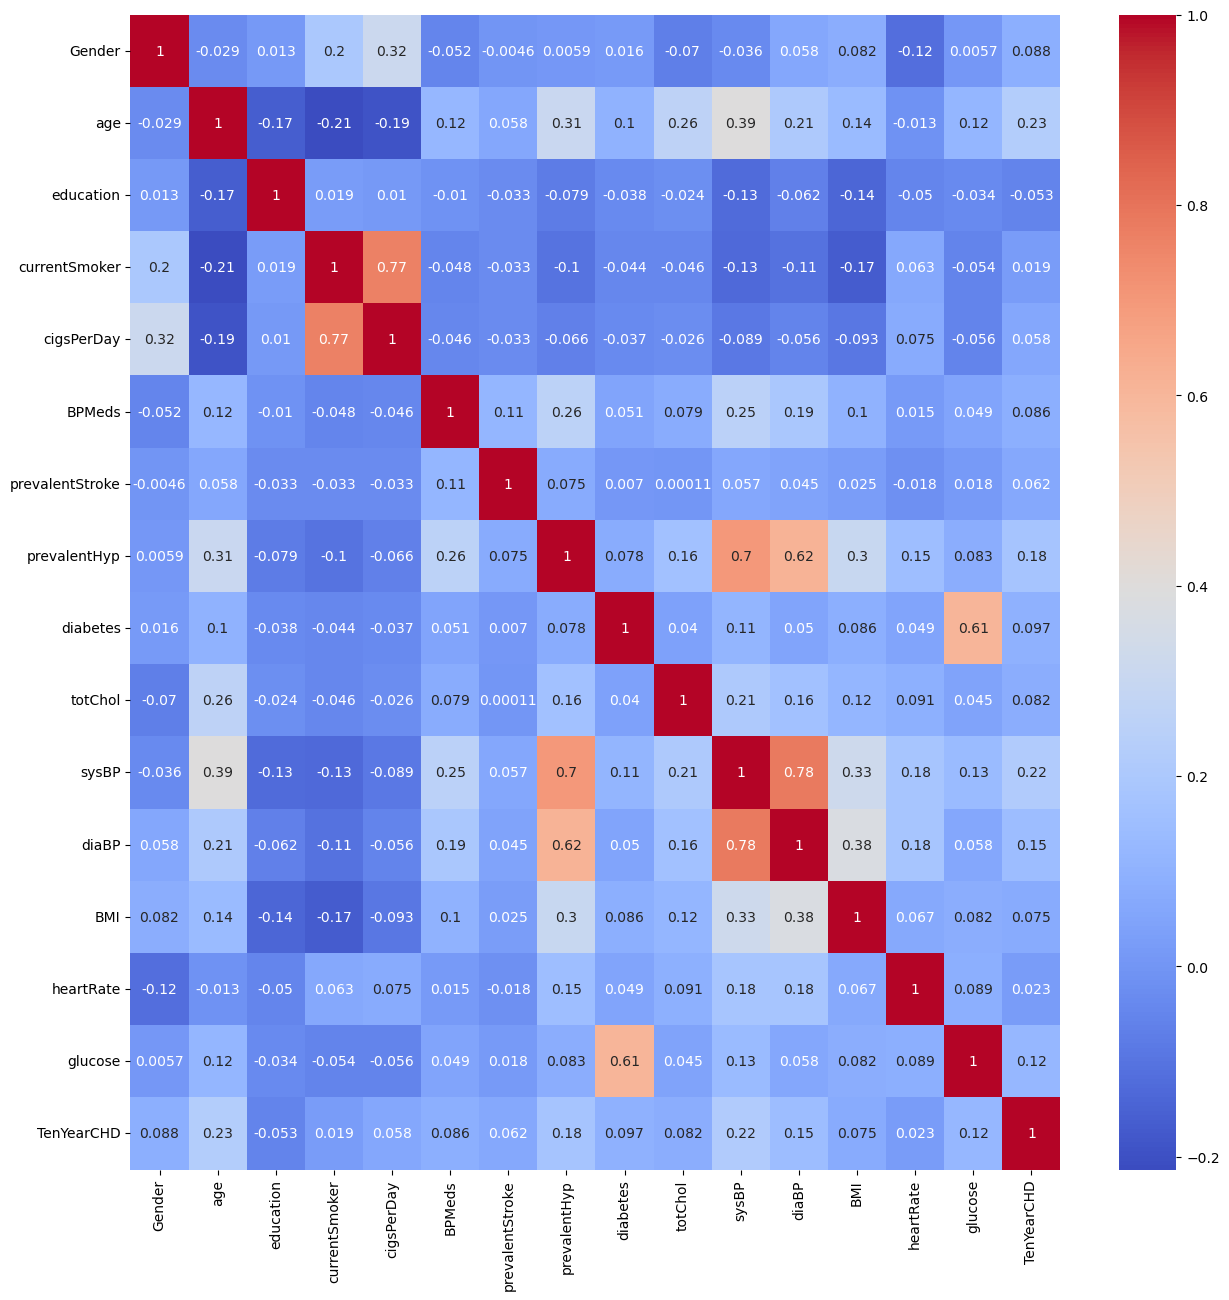

In [110]:
plt.figure(figsize=(15,15))
sns.heatmap(data_knn_o.corr(),annot=True,cmap='coolwarm')
plt.show()

In [111]:
def remove_outlier(col):

    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    return lower_bound,upper_bound

for column in data_knn_o.drop(['glucose','TenYearCHD'],axis=1).columns:

    lb,ub=remove_outlier(data_knn_o[column])

    data_knn_o[column]=np.where(data_knn_o[column]>ub,ub,data_knn_o[column])

    data_knn_o[column]=np.where(data_knn_o[column]<lb,lb,data_knn_o[column])


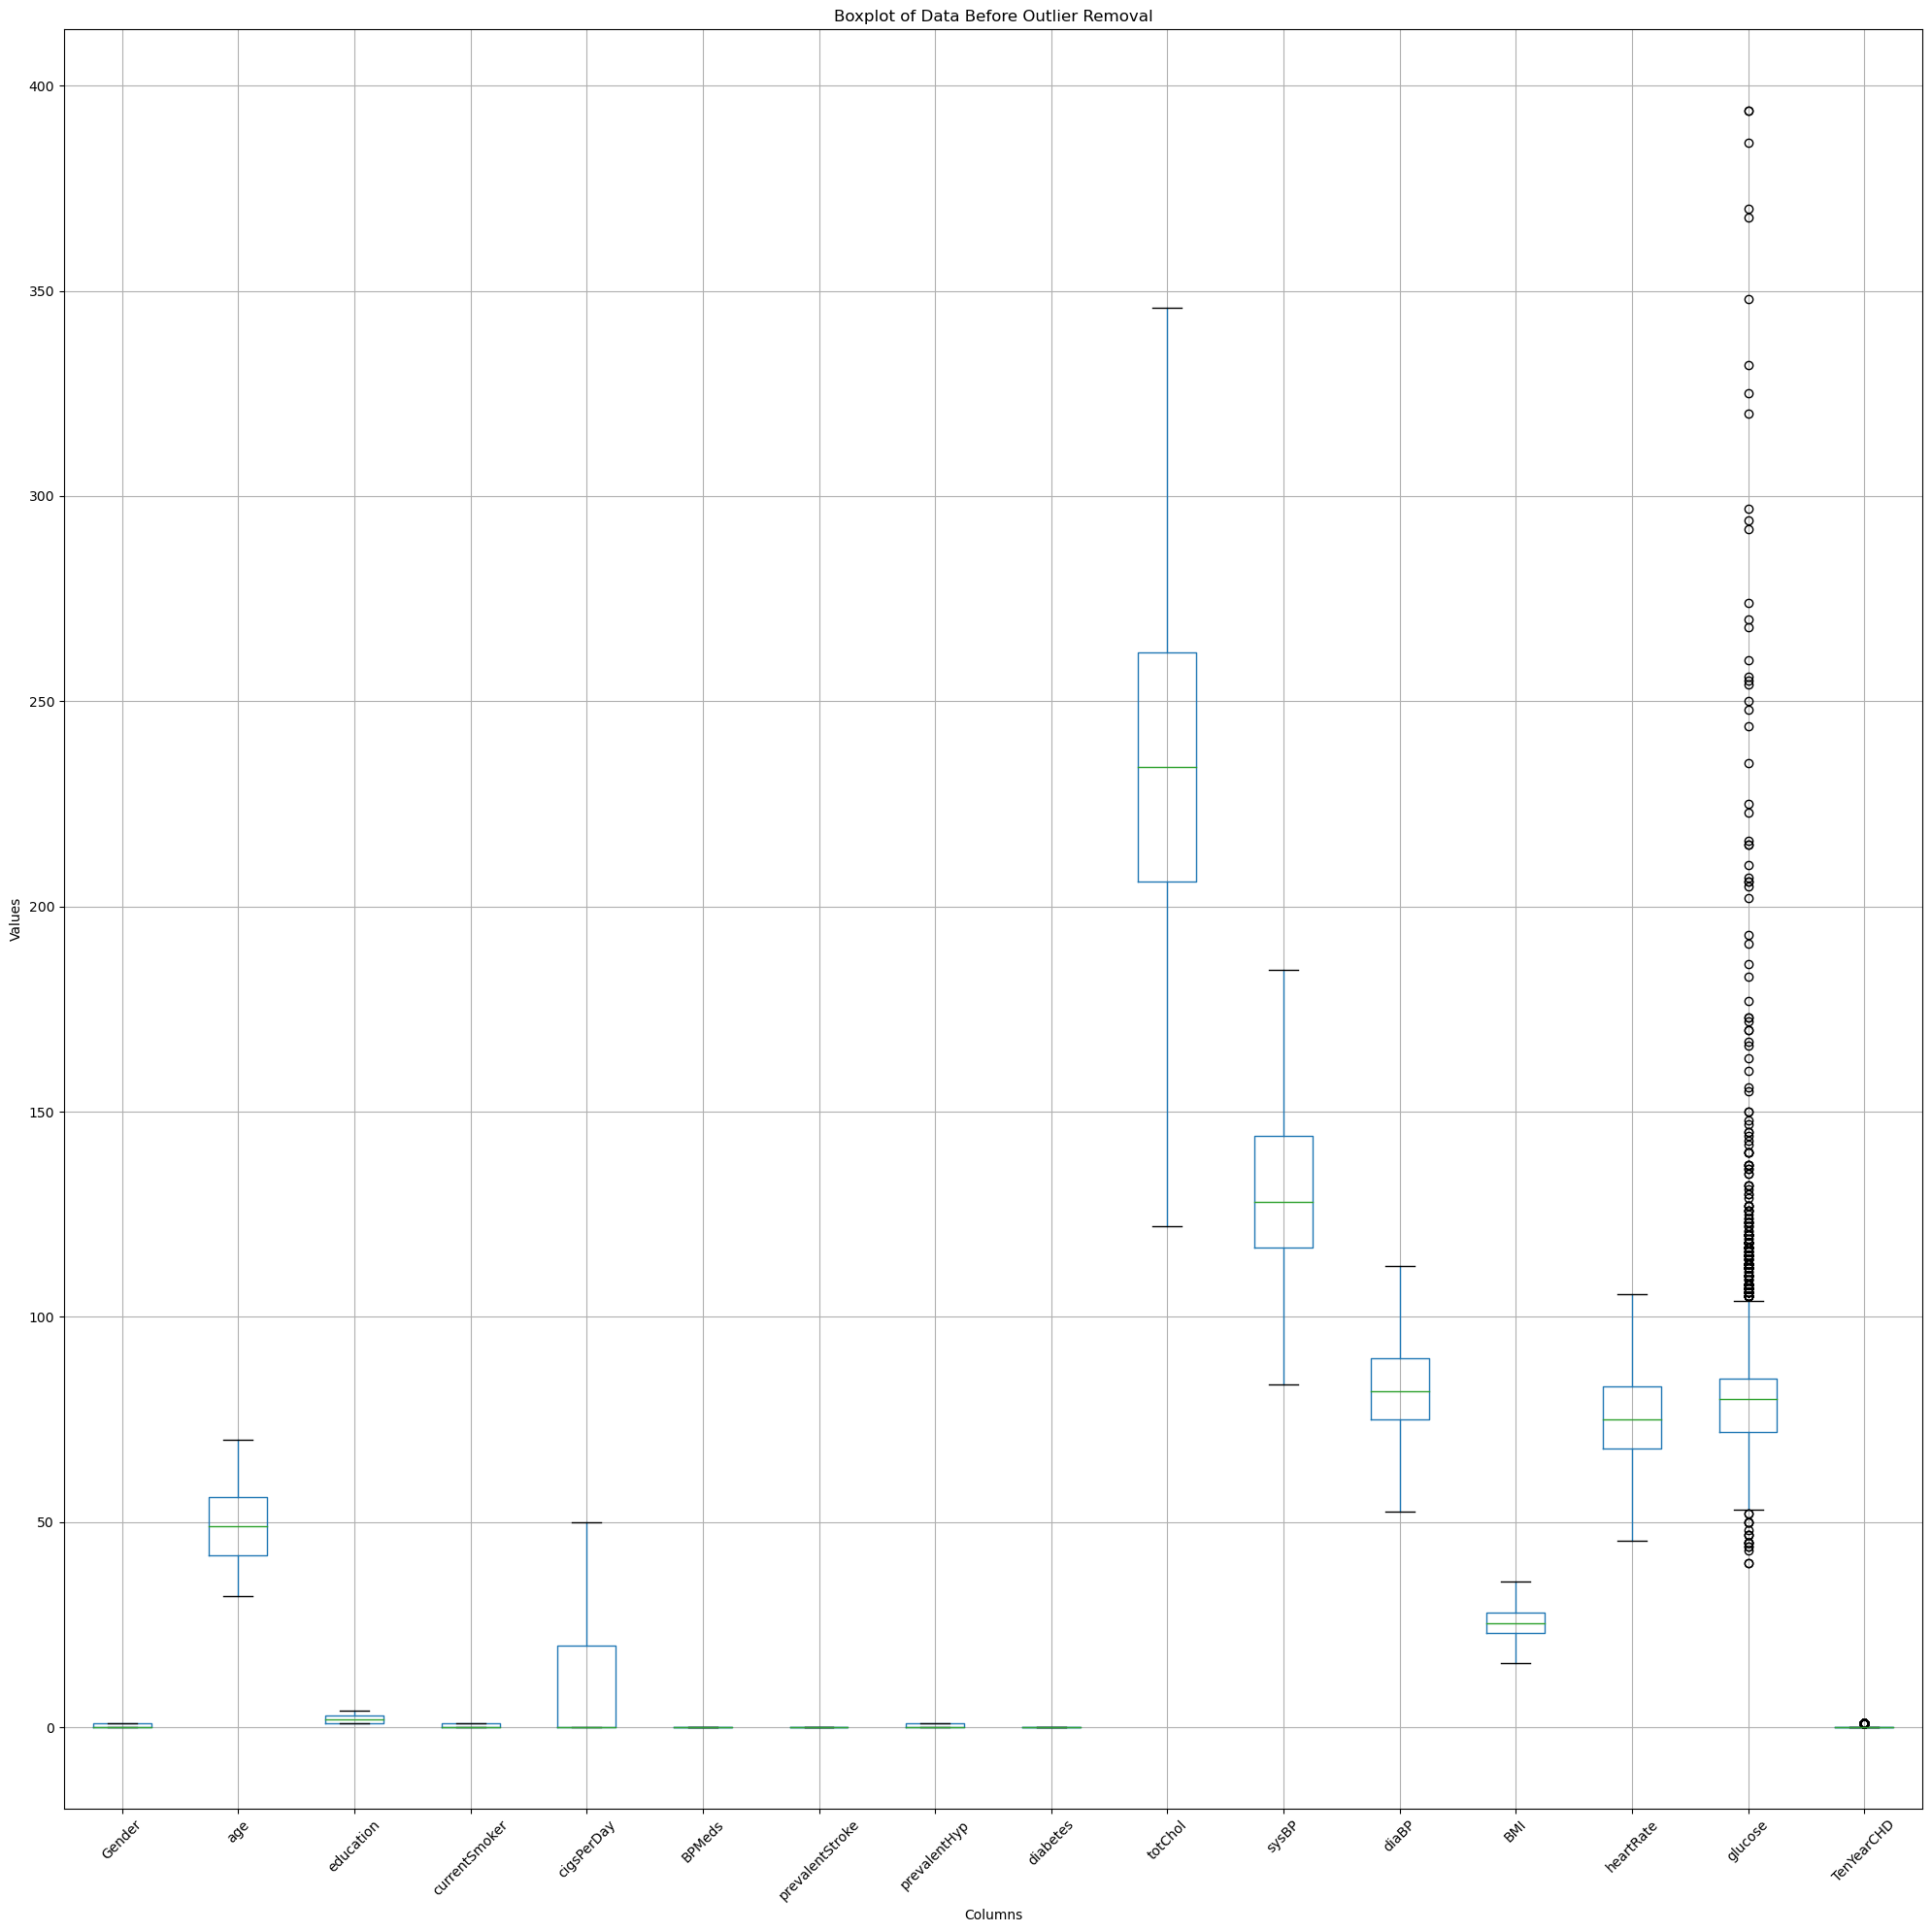

In [112]:
def boxplot_before(df):
    df.boxplot(figsize=(20, 20))
    plt.title('Boxplot of Data Before Outlier Removal')
    plt.xticks(rotation=45)
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()


boxplot_before(data_knn_o)

In [113]:
X = data_knn_o.drop('TenYearCHD',axis=1)
y = data_knn_o['TenYearCHD']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state = 42)

In [114]:
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [115]:
RF_model = RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [116]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [117]:
GB_model = GradientBoostingClassifier(n_estimators=100,random_state=1)
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [118]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [119]:
from sklearn import metrics

# Assuming these models are already defined and trained
models = [DT_model, KNN_model, GB_model, ADB_model, RF_model]

train_acc = []
test_acc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []

# Ensure X_train, X_test, y_train, y_test are defined and available
# Assuming they are defined like this:
# X_train, X_test, y_train, y_test = train_test_split(...)

def get_metrics_score(model, flag):
    # Ensure predictions are based on the correct training and test sets
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    # Check the consistency of y and predictions
    assert len(y_train) == len(pred_train), "Inconsistent number of samples in y_train and pred_train"
    assert len(y_test) == len(pred_test), "Inconsistent number of samples in y_test and pred_test"
    
    acc_train = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    recall_train = metrics.recall_score(y_train, pred_train)
    recall_test = metrics.recall_score(y_test, pred_test)
    
    precision_train = metrics.precision_score(y_train, pred_train)
    precision_test = metrics.precision_score(y_test, pred_test)
    
    return [acc_train, acc_test, recall_train, recall_test, precision_train, precision_test]

for model in models:
    j = get_metrics_score(model, False)
    train_acc.append(np.round(j[0], 2))
    test_acc.append(np.round(j[1], 2))
    train_recall.append(np.round(j[2], 2))
    test_recall.append(np.round(j[3], 2))
    train_precision.append(np.round(j[4], 2))
    test_precision.append(np.round(j[5], 2))

In [120]:
comparison_frame = pd.DataFrame({'Model': ['DT_model_knn_o', 'KNN_model_knn_o', 'GB_model_knn_o', 'ADB_model_knn_o', 'RF_model_knn_o'],
                                 'Train_Accuracy': train_acc, 'Test_Accuracy': test_acc,
                                 'Train_Recall': train_recall, 'Test_Recall': test_recall,
                                 'Train_Precision': train_precision, 'Test_Precision': test_precision})

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_knn_o,1.00,0.77,1.00,0.31,1.00,0.28
1,KNN_model_knn_o,0.86,0.84,0.21,0.11,0.64,0.41
2,GB_model_knn_o,0.88,0.85,0.22,0.08,0.96,0.47
3,ADB_model_knn_o,0.86,0.84,0.14,0.10,0.72,0.42
4,RF_model_knn_o,1.00,0.85,1.00,0.06,1.00,0.63


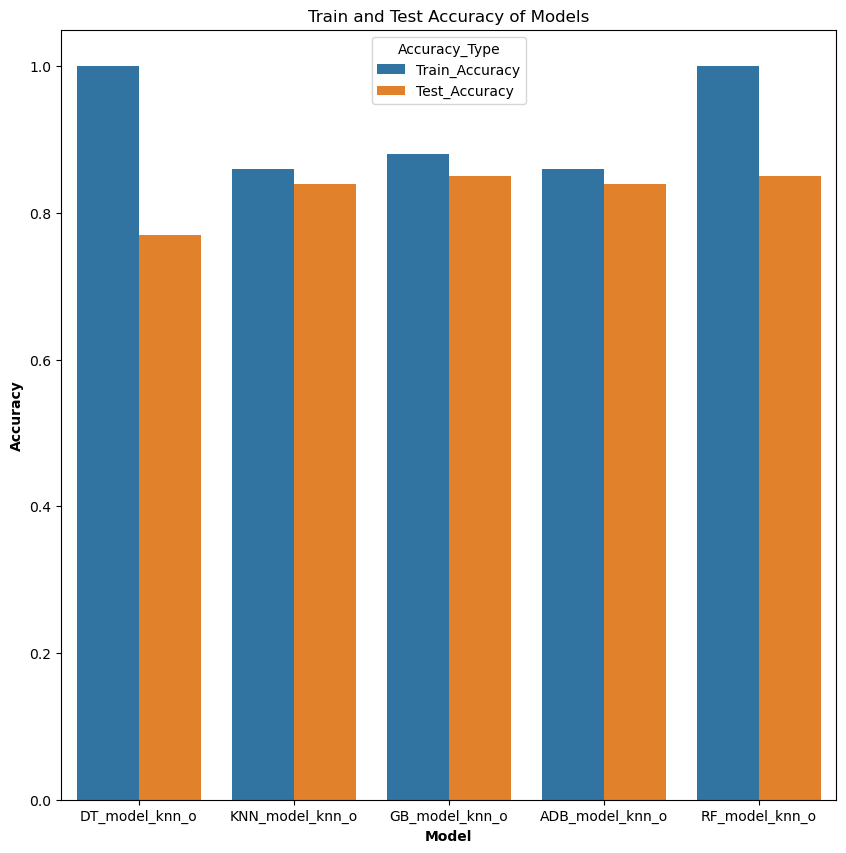

In [121]:



# comparison_frame = pd.DataFrame({'Model': ['DT_model', 'KNN_model', 'GB_model', 'ADB_model', 'RF_model'],
#                                  'Train_Accuracy': train_acc, 'Test_Accuracy': test_acc,
#                                  'Train_Recall': train_recall, 'Test_Recall': test_recall,
#                                  'Train_Precision': train_precision, 'Test_Precision': test_precision})


accuracy_df = comparison_frame.melt(id_vars='Model', value_vars=['Train_Accuracy', 'Test_Accuracy'], 
                                    var_name='Accuracy_Type', value_name='Accuracy')


plt.figure(figsize=(10, 10))


sns.barplot(x='Model', y='Accuracy', hue='Accuracy_Type', data=accuracy_df)


plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')


plt.title('Train and Test Accuracy of Models')
plt.show()

In [122]:
data_knn_o = data_knn_o.to_csv('data_knn_o.csv')

In [123]:
data_knn2 = data_knn2.to_csv('data_knn.csv')

In [124]:
Comparison_frame = comparison_frame.to_csv('Model_comparison.csv')